<a href="https://colab.research.google.com/github/pkky/Projekty/blob/main/ProjektS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaprogramuj algorytm rozwiązujący modyfikację TSP, gdzie miasto startowe jest inne od końcowego, z pomocą ACO.

In [1]:
# biblioteka numeryczna
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt

# pomar czasu
import time

# skumulowana suma tablicy
from itertools import accumulate

from itertools import permutations

Problem TSP

In [2]:
n=50 # dla algorytmu mrówkowego

cities = np.array([[random.random(),random.random()] for i in range(n)]) # lista współrzędnych miast
cities

array([[0.73682881, 0.98814925],
       [0.69354761, 0.07831869],
       [0.32769697, 0.72392215],
       [0.83222863, 0.84974882],
       [0.19627312, 0.59315623],
       [0.72143029, 0.8053841 ],
       [0.21622482, 0.88270036],
       [0.65094825, 0.9591945 ],
       [0.63535317, 0.79903643],
       [0.09291171, 0.40445074],
       [0.96688602, 0.73717742],
       [0.7164665 , 0.65667361],
       [0.81633683, 0.08621981],
       [0.71268505, 0.03906616],
       [0.22145186, 0.10575944],
       [0.24850458, 0.09037107],
       [0.92356685, 0.53901407],
       [0.34726972, 0.94974989],
       [0.3713173 , 0.42409109],
       [0.28341497, 0.06931587],
       [0.4129492 , 0.70662916],
       [0.17076248, 0.7230442 ],
       [0.70364822, 0.7434007 ],
       [0.75425081, 0.17604913],
       [0.14765299, 0.33684896],
       [0.6260621 , 0.77908733],
       [0.642088  , 0.52604232],
       [0.49101789, 0.17505961],
       [0.31706169, 0.53548844],
       [0.54867898, 0.8899594 ],
       [0.

In [3]:
x = n-1

In [4]:
# odległość euklidesowa
def dist(i,j):
    return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

In [5]:
# długość drogi
def len_path(path): #path to dowolna ścieżka; daje długośc ścieżki łączącej miasta
    return sum([dist(path[i],path[i+1]) for i in range(x)])

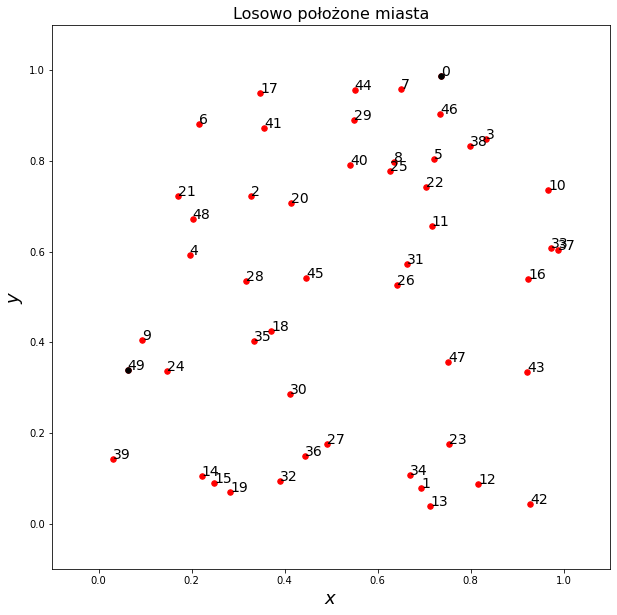

In [6]:
plo_cities=plt.figure(figsize=(10,10))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='red', s=30)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[n-1,0],cities[n-1,1],c='black',s=30)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [7]:
# losowa droga - np.random.permutation 
# dodanie miasta 0 na początku i na końcu
sequence = np.insert(np.append(np.random.permutation(x-1)+1,n-1),0,0)  #sekwencja miast z losową permutacją
sequence

array([ 0, 12, 28, 33, 24,  7, 23, 20,  2,  4, 13, 38, 41, 19, 30, 26, 44,
       46, 45, 39, 22, 34, 35, 18, 40, 48, 31, 25,  1, 37, 11,  3, 17, 10,
       27, 32, 43, 15,  8, 36,  9, 29, 21,  5, 16,  6, 47, 14, 42, 49])

In [8]:
# powyżej była lista miast, teraz lista odpowiadających im współrzędnych
tour = np.array([cities[i] for i in sequence])
# porównaj wizualnie z powyższym rysunkiem
tour

array([[0.73682881, 0.98814925],
       [0.81633683, 0.08621981],
       [0.31706169, 0.53548844],
       [0.9727892 , 0.60817508],
       [0.14765299, 0.33684896],
       [0.65094825, 0.9591945 ],
       [0.75425081, 0.17604913],
       [0.4129492 , 0.70662916],
       [0.32769697, 0.72392215],
       [0.19627312, 0.59315623],
       [0.71268505, 0.03906616],
       [0.79843779, 0.83388634],
       [0.35674817, 0.87259559],
       [0.28341497, 0.06931587],
       [0.41083462, 0.28602828],
       [0.642088  , 0.52604232],
       [0.55048382, 0.95598564],
       [0.73427994, 0.90316777],
       [0.44712457, 0.54139697],
       [0.03199152, 0.14334615],
       [0.70364822, 0.7434007 ],
       [0.67065844, 0.10653704],
       [0.33395286, 0.40256976],
       [0.3713173 , 0.42409109],
       [0.5416379 , 0.79079597],
       [0.20233732, 0.67311508],
       [0.6622744 , 0.57205216],
       [0.6260621 , 0.77908733],
       [0.69354761, 0.07831869],
       [0.98879831, 0.60338131],
       [0.

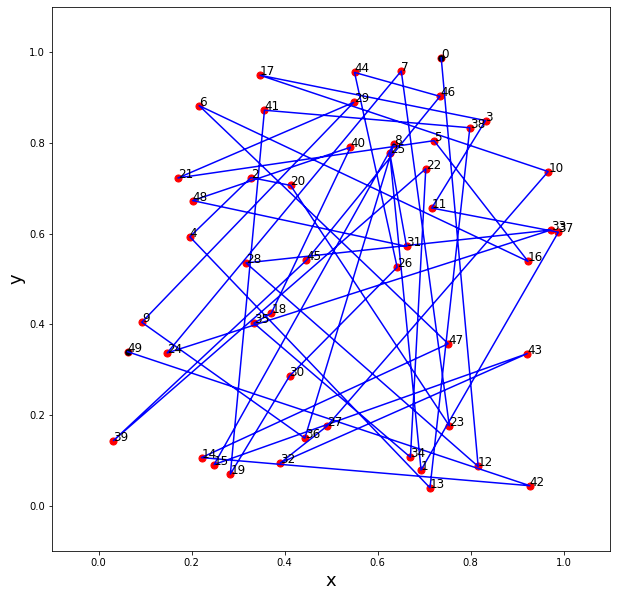

In [9]:
plt.figure(figsize=(10,10))

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.plot(tour[:,0],tour[:,1],c='blue')

plt.scatter(cities[:,0],cities[:,1],c='red',s=50)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[x,0],cities[x,1],c='black',s=30)

for i in range(n):
    plt.annotate(i,(cities[i,0],cities[i,1]),fontsize=12)

plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18);

ACO dla TSP

In [10]:
# tablica odległości między miastami
dis_tab = np.array([[dist(i,j) for i in range(n)] for j in range(n)])
np.round(dis_tab,2) # zaokrąglenie dla przejrzystości wydruku

array([[0.  , 0.91, 0.49, ..., 0.63, 0.62, 0.94],
       [0.91, 0.  , 0.74, ..., 0.28, 0.77, 0.68],
       [0.49, 0.74, 0.  , ..., 0.56, 0.14, 0.47],
       ...,
       [0.63, 0.28, 0.56, ..., 0.  , 0.63, 0.69],
       [0.62, 0.77, 0.14, ..., 0.63, 0.  , 0.36],
       [0.94, 0.68, 0.47, ..., 0.69, 0.36, 0.  ]])

In [11]:
# początkowa tablica feromonów - na razie wszędzie tyle samo!
fero = np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n)
fero

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [12]:
# parametry modelu dot. prawdopodobieństwa wyboru drogi przez mrówkę

alpha = 1.15;
beta = 1;

h = 0.03; # szybkość uaktualniania śladów feromonowych
# po kolejnym etapie algorytmu feromony_nowe = (1-h) feromony_stare + h feromony_złożone

popsize = 10; # liczba mrówek "na trasie" w kolejnym etapie algorytmu

sc = n/popsize; # kontroluje, ile feromonu jest zostawiane = liczba miast/liczba mrówek

# odkładana przez mrówkę ilość feromonu to sc/długość odcinka

In [13]:
# Zwraca (losowo) miasto do odwiedzenia z listy miast togo, jeśli mrówka jest w mieście i.
# Stosujemu oczywiście naszą maszynke ind_prob.

def ac_next(i, togo):
    p = np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo]) # wagi
    su = np.sum(p) # suma wag
    p = p/su # prawdopodobieństwa (wagi znormalizowane do 1)
    return togo[ind_prob(p)]

In [14]:
to_v = [i for i in range(1,n)] # miasta do odwiedzenia (na razie wszystkie)
to_v

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [15]:
# zebranie powyższych instrukcji w jedną funkcję
def ind_prob(tab_p):
    cum_p = np.array(list(accumulate(tab_p)))
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)

In [16]:
# tablica prawdopodobieństw
tab_p = np.array([0.5, 0.2, 0.1, 0.2])
cum_p = np.array(list(accumulate(tab_p)))
np.round(cum_p,2)

array([0.5, 0.7, 0.8, 1. ])

In [17]:
ind_prob(tab_p)

0

In [18]:
ac_next(0,to_v) # losowo wybrane kolejne miasto, jeśli mrówka jest w mieście 0

43

In [19]:
tt=[ac_next(0,to_v) for _ in range(10000)] # 10000 wyborów (na próbę)

In [20]:
# jeden etap algorytmu
# liczba pop mrówek wyrusza w trasę, każda z losowo wybranego miasta

def ac_one(pop):
    lm=10**10 # coś dużego - aktualna długość najlepszej trasy
    global fero2 # macierz "nowych" feromonów, które zostawią mrówki
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)]) # inicjalizacja jako 0
    for mr in range(pop): # petla po mrówkach
        print()
        print("mrówka numer:",mr)
        print()
        #pos=random.randint(0,n-1) # początkowe losowe miasto dla danej mrówki
        pos=0
        posx=x
        route=[pos] # dodanie miasta początkowego do trasy
        print(pos)
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)] # miasta do odwiedzenia
        print(to_v)
        
        for k in range(n-1): # pętla po liczbie miast do odwiedzenia
          pos=ac_next(pos,to_v) # nastepne miasto, wybrane wg prawdopodobieństwa ...
          route.append(pos) # dodanie tego miasta do trasy
          to_v.remove(pos)  # usunięcie z listy miast do odwiedzenia
          print(pos)
          print(to_v)
          
        print(route)
        
        lr=len_path(route) # długość trasy
        print("obecna długość:",lr)
        if lr<lm: # jeśli trasa jest krótsza od aktualnie najlepszej ... 
            lm=lr # ... to uaktualnij długość najkrótszej trasy ...
            r_opt=route # ... i zapamietaj ją jako r_opt
        print("najkrótsza długość:",lm)    
            
    for i in range(n-1): # pozostawione feromony na każdym odcinku trasy
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm # w przód
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm # wspak
            # symetryzujemy dla symetrycznego problemu TSP - w ogólności nie musi tak być            
          
    return lm, r_opt # zwróć długość najkrótszej trasy i trasę
    

In [21]:
opt=ac_one(3) # działanie powyższego algorytmu dla 3 mrówek


mrówka numer: 0

0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
47
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]
3
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]
28
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]
21
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]
17
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20

In [22]:
np.round(fero2,2) # złożone feromony 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
opt # najkrótsza znaleziona trasa

(18.943124798794017,
 [0,
  25,
  20,
  38,
  23,
  1,
  34,
  39,
  36,
  27,
  19,
  49,
  31,
  30,
  48,
  26,
  44,
  46,
  40,
  29,
  7,
  33,
  16,
  47,
  8,
  12,
  45,
  2,
  5,
  22,
  13,
  15,
  14,
  4,
  21,
  17,
  10,
  11,
  3,
  42,
  41,
  18,
  32,
  43,
  35,
  28,
  37,
  24,
  9,
  6])

In [24]:
# cały algorytm mrówkowy dla TSP (10 linijek + 20 linijek kodu ac_one)

iter=10000
# iter=10000 # liczba iteracji dla n=50

min_l=10**10 # coś dużego, początkowa długość najlepszej drogi (numeryczna nieskonczoność)
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
     # początkowa macierz feromonów

for k in range(iter):   # pętla po iteacjach
    opt=ac_one(popsize) # jeden "zespół" popsize mrówek na trasie

    if opt[0]<min_l: # jeśli znaleziona droga krótsza, uaktualnij ...
        min_l=opt[0] # ... jej długość ...
        best_route=opt[1] # ... i trasę
        print('zmiana w kroku ',k) # wydruk, by było widać, że optimum się zmienia
# ważne!         
    fero=(1-h)*fero+h*fero2 # uaktualnienie macierzy feromonów
        # parowanie "starego" feromonu, dodanie nowego

print()
print(min_l, best_route) # najlepsza trasa
print()
    
print(np.round(fero,2)) # końcowa macierz feromonów


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[9, 24]
9
[24]
24
[]
[0, 46, 38, 3, 10, 37, 33, 16, 43, 42, 12, 13, 1, 34, 23, 47, 26, 31, 11, 22, 5, 8, 25, 40, 29, 7, 44, 17, 41, 6, 21, 48, 4, 28, 2, 20, 45, 18, 35, 30, 27, 36, 32, 19, 15, 14, 39, 49, 9, 24]
obecna długość: 5.376579424710566
najkrótsza długość: 5.376579424710566

mrówka numer: 3

0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
46
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]
38
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]
3
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

In [25]:
best_route

[0,
 46,
 38,
 3,
 10,
 37,
 33,
 16,
 43,
 42,
 12,
 13,
 1,
 34,
 23,
 47,
 26,
 31,
 11,
 22,
 5,
 8,
 25,
 40,
 29,
 7,
 44,
 17,
 41,
 6,
 21,
 48,
 4,
 28,
 2,
 20,
 45,
 18,
 35,
 30,
 27,
 36,
 32,
 19,
 15,
 14,
 39,
 49,
 9,
 24]

In [41]:
w=np.append(best_route,x)
w=np.delete(w,47)
w

array([ 0, 46, 38,  3, 10, 37, 33, 16, 43, 42, 12, 13,  1, 34, 23, 47, 26,
       31, 11, 22,  5,  8, 25, 40, 29,  7, 44, 17, 41,  6, 21, 48,  4, 28,
        2, 20, 45, 18, 35, 30, 27, 36, 32, 19, 15, 14, 39,  9, 24, 49])

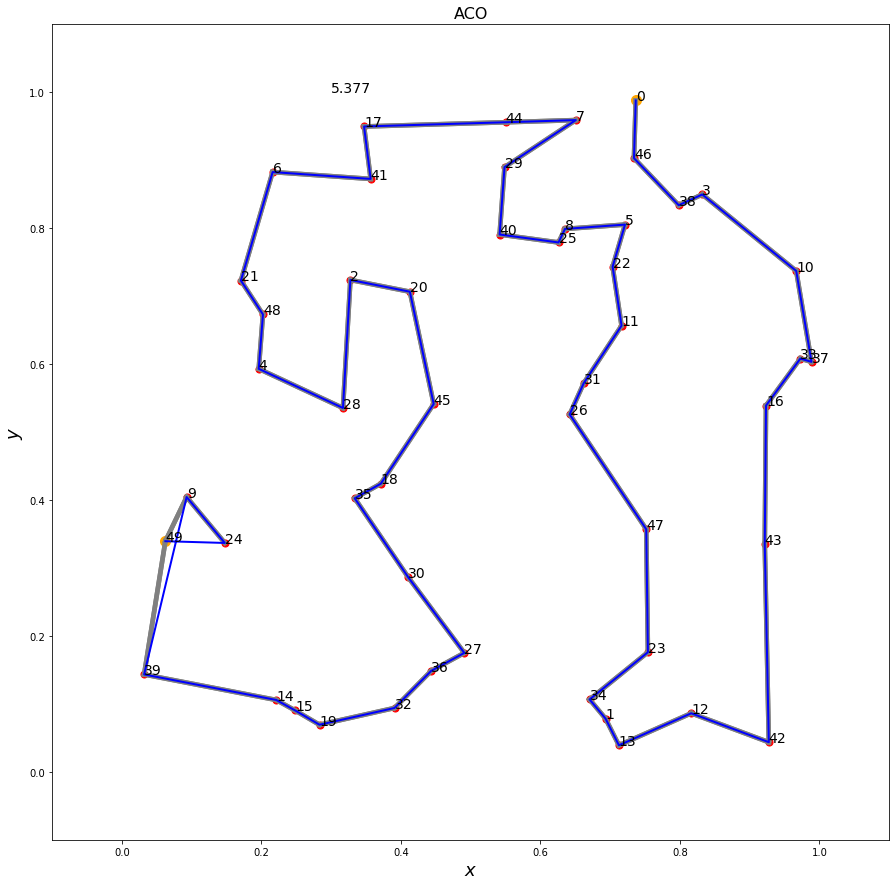

In [36]:
plo_mro=plt.figure(figsize=(15,15))
plt.title("ACO",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=5*fero[i,j]) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in w])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=2)


plt.scatter(cities[:,0],cities[:,1],c='red', s=50)
plt.scatter(cities[0,0],cities[0,1],c='orange', s=100)
plt.scatter(cities[n-1,0],cities[n-1,1],c='orange', s=100)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [32]:
w

array([ 0, 46, 38,  3, 10, 37, 33, 16, 43, 42, 12, 13,  1, 34, 23, 47, 26,
       31, 11, 22,  5,  8, 25, 40, 29,  7, 44, 17, 41,  6, 21, 48,  4, 28,
        2, 20, 45, 18, 35, 30, 27, 36, 32, 19, 15, 14, 39,  9, 24, 49])